<a href="https://www.kaggle.com/code/anucoolchandra/heart-failure-prediction-project?scriptVersionId=105903187" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure/heart_failure.csv


# Defining the Problem

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. 

**Objective:** To create a classification filter (Using Logistics Regression & KNN Classification Algorithm) to predict Heart Failure, Compare the performance of the filters.


# Understanding the problem

The problem is to predict whether for a given sample of a person, is the person at a risk of Heart Failure or not. We are going to create a model for prediction using a dataset provided along with the problem which is going to have several determining factors/characteristics for heart failure such as whether the person is a smoker, or he/she is suffering from hypertension(high blood pressure).
We are going to use Python 3.7.12 version for the analysis.

In [2]:
import platform
print(platform.python_version())

3.7.12


Sex - Gender of patient: Male = 1, Female =0

Age - Age of patient

Diabetes - Whether the person has Diabetes:  0 = No, 1 = Yes

Anaemia - Whether the person has Anaemia:  0 = No, 1 = Yes

High_blood_pressure - Whether the person has Hypertension:  0 = No, 1 = Yes

Smoking - Whether the smokes:  0 = No, 1 = Yes

DEATH_EVENT - Whether the person has died:  0 = No, 1 = Yes


Time column show the number of days before the dead event happened, or the patient decided not to continue with the experimental, or it could be some events happened that the patient could not continue the experimental.

We can use that for the survival analysis.

## Importing Libraries

In [3]:
#These are the most commonly used libraries for basic data processing and visualisation.
#Other libraries which are important for further analysis, we will be importing later.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")


# Importing the Data

The dataset is imported from kaggle. Link- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


**Credits:**

**Citation**

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

In [4]:
import pandas as pd
data = pd.read_csv('../input/heart-failure/heart_failure.csv')
data.head() #Checking the data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Exploration

In [5]:
#Checking the shape of the dataset
data.shape

(299, 13)

This dataset contains 299 rows and 13 columns.

In [6]:
#Checking the name of the columns for Predictors(Independent Variables) and Dependent Variable(s).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
#Using describe method for range, value counts and central tendencies.
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
#Checking unique values of the output variable
data.DEATH_EVENT.unique()

array([1, 0])

Here in this data, **DEATH_EVENT** column is the **target variable** which we will be categorical.It consists of two values, 0 and 1 where

**0: NO**

**1: YES**

## Data Cleaning: Missing/Null/NaN Value Check

In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

All the values in the dataset are non-null values

### Distinguishing between Categorical and Continuous Variables

In [10]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

This implies that we have 6 categorical variables in or data namely 
1. Anaemia
2. Diabetes
3. High Blood Pressure
4. Sex
5. Smoking
6. DEATH_EVENT

among them, DEATH_EVENT is the target variable.


# Explanatory Data Analysis (EDA) & Data Preprocessing
## Univariate Analysis

We will be analyzing the histograms for frequency distribution and boxplots for outliers and range of the data for all the continuous numerical variables.

**1. Age**

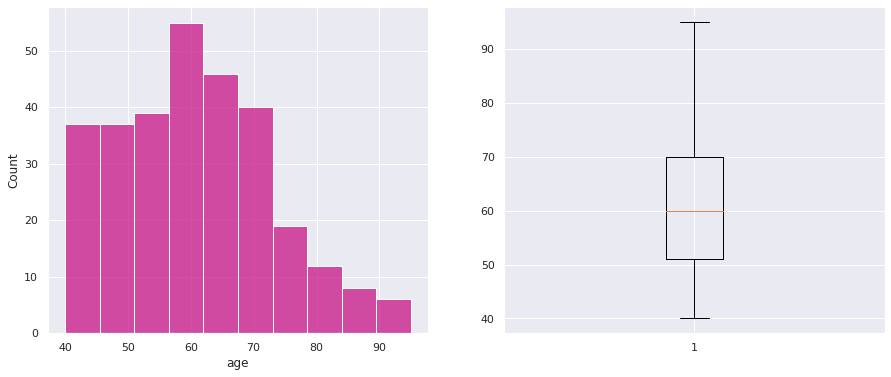

In [11]:

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=data.age, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(data.age)
plt.show()

This shows that Age range is between 40 and 95 years and the median age is 60 years.

**2. creatinine_phosphokinase**

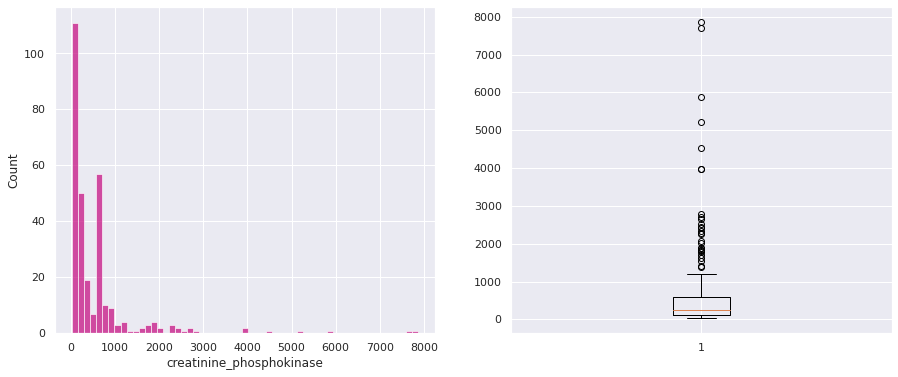

In [12]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=data.creatinine_phosphokinase, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(data.creatinine_phosphokinase)
plt.show()

This variable has too many outliers. The distribution is highly right skewed and the data ranges between 23 to 7800. The mean lies at 581 and the median at 250.
Since there are so many outliers in the variable, it should not be the predictor variable as it may bias the results.

**3. ejection_fraction**

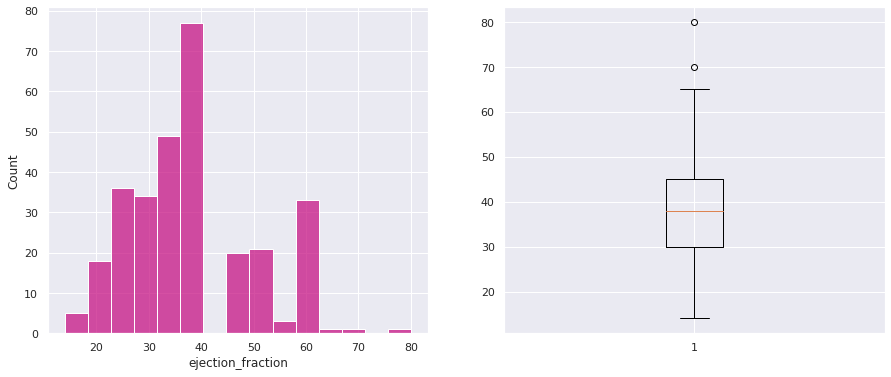

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=data.ejection_fraction, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(data.ejection_fraction)
plt.show()

This variable is distributed in the range of 14 to 80. Mean as well as median value lies at 38. Two outliers stand at 70 and 80. These outliers must be removed for further analysis.

**4. platelets**

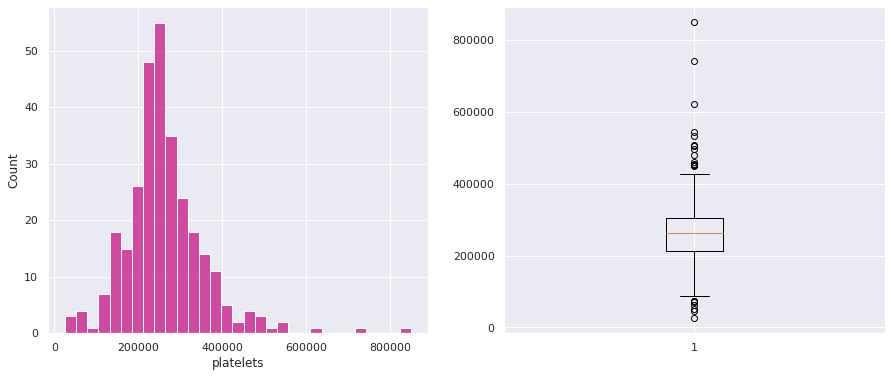

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=data.platelets, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(data.platelets)
plt.show()

This distribution seems right skewed distribution because of the presence of outliers. The range is 25k to 850k and the mean as well as median lie at 260k.Since there are so many outliers in the variable, it should not be the predictor variable as it may bias the results.

**5. serum_creatinine**

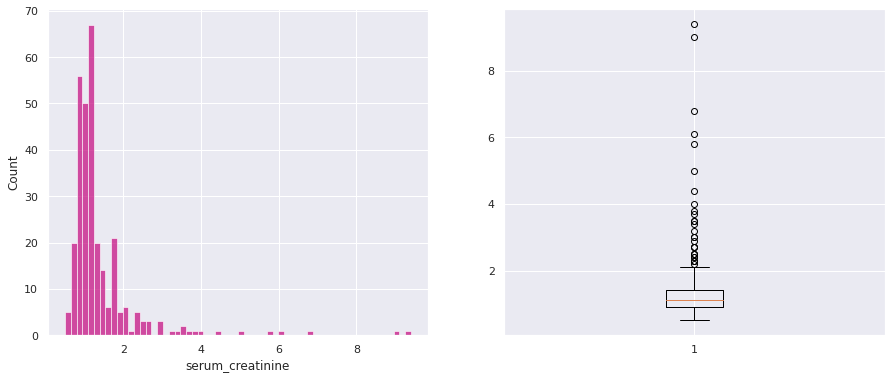

In [15]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=data.serum_creatinine, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(data.serum_creatinine)
plt.show()

This distribution also seems right skewed distribution because of the presence of outliers. The range is 0.9 to 9.4.Since there are so many outliers in the variable, it should not be the predictor variable as it may bias the results.

**6. serum_sodium**

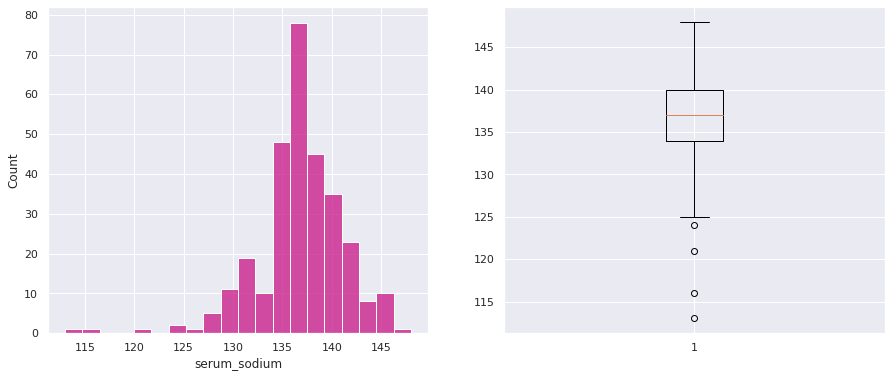

In [16]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=data.serum_sodium, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(data.serum_sodium)
plt.show()

This distribution is left skewed. There are 4 outliers on the left. The data ranges between 113 to 147 and averaged at 137. These outliers must be removed for further analysis.

**7. time**

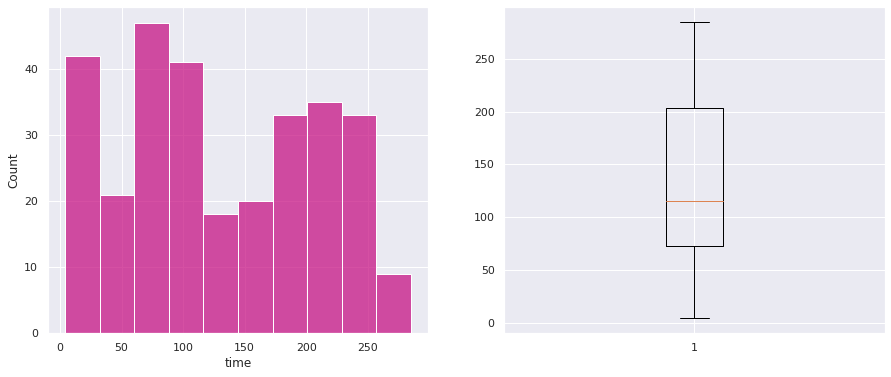

In [17]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(x=data.time, color='mediumvioletred')
plt.subplot(1,2,2)
plt.boxplot(data.time)
plt.show()

This data ranges between 4 to 185 averaged at 130. Time column show the number of days before the dead event happened, or the patient decided not to continue with the experimental, or it could be some events happened that the patient could not continue the experimental.

However, we can not include this column for the analysis and model building because while prediction,the time of death/time of withdrawl from the experiment is not known.So, it cannot be used as an input variable.

In [18]:
data.drop(['time'], axis=1,inplace=True)

**Analysis of categorical variables**

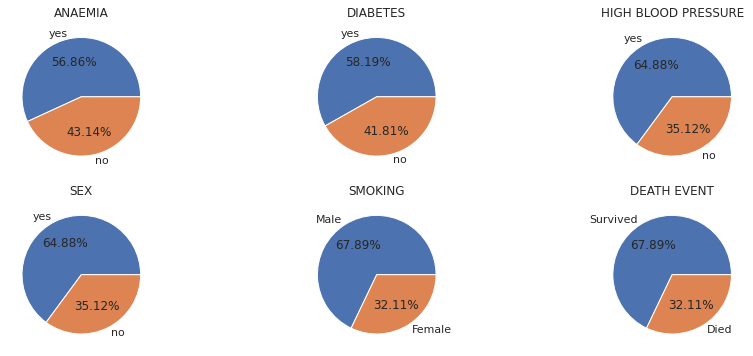

In [19]:
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
plt.pie(x=data.anaemia.value_counts(),labels =['yes','no'],autopct='%1.2f%%')
plt.title('ANAEMIA')
plt.subplot(2,3,2)
plt.pie(x=data.diabetes.value_counts(),labels =['yes','no'],autopct='%1.2f%%')
plt.title('DIABETES')
plt.subplot(2,3,3)
plt.pie(x=data.high_blood_pressure.value_counts(),labels =['yes','no'],autopct='%1.2f%%')
plt.title('HIGH BLOOD PRESSURE')
plt.subplot(2,3,4)
plt.pie(x=data.sex.value_counts(),labels =['yes','no'],autopct='%1.2f%%')
plt.title('SEX')
plt.subplot(2,3,5)
plt.pie(x=data.smoking.value_counts(),labels =['Male','Female'],autopct='%1.2f%%')
plt.title('SMOKING')
plt.subplot(2,3,6)
plt.pie(x=data.DEATH_EVENT.value_counts(),labels =['Survived','Died'],autopct='%1.2f%%')
plt.title('DEATH EVENT')
plt.show()


Among these 6 variables, DEATH_EVENT is the target variable and the rest 5 are input variables. 

**Inferences:**
1. In the dataset, most of the patients are suffering from Anaemia, Diabetes, High Blood Pressure.

2. Most of the patients are Male and active smokers.

## Data Cleaning: Dealing with the Outliers

In the univariate analysis we found that there were too many outliers in the column 
1. creatinine_phosphokinase
2. platelets
3. serum_creatinine

These variables can create bias in the results and should be dropped.

In [20]:
data.drop(['creatinine_phosphokinase','platelets','serum_creatinine'], axis=1,inplace=True)
#checking whether the columns have been dropped
data.head(2)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,0,20,1,130,1,0,1
1,55.0,0,0,38,0,136,1,0,1


Now, we have seen that there were 2 outliers in the ejection_fraction column and 4 outliers in the serum_sodium column. Thus, we have to remove the respective columns fromm the dataset.

In [21]:
# Position of the Outliers
print(np.where(data['ejection_fraction']>65)) #values above 65 are outliers as per the boxplot
print(np.where(data['serum_sodium']<125)) #values below 125 are outliers as per the boxplot

(array([ 64, 217]),)
(array([  4,  19, 126, 199]),)


In [22]:
#Dropping the respective columns
data.drop([64,217,4,19,126,199], axis=0, inplace=True)
#checking whether the columns have been dropped
print(np.where(data['ejection_fraction']>65))
print(np.where(data['serum_sodium']<125))

(array([], dtype=int64),)
(array([], dtype=int64),)


In [23]:
#Outliers have been dropped, checking the shape of the dataframe.
data.shape

(293, 9)

## Bivariate Analysis

We will now plot the DEATH EVENT with each of the features and see which feature effects the output variable by what extent.

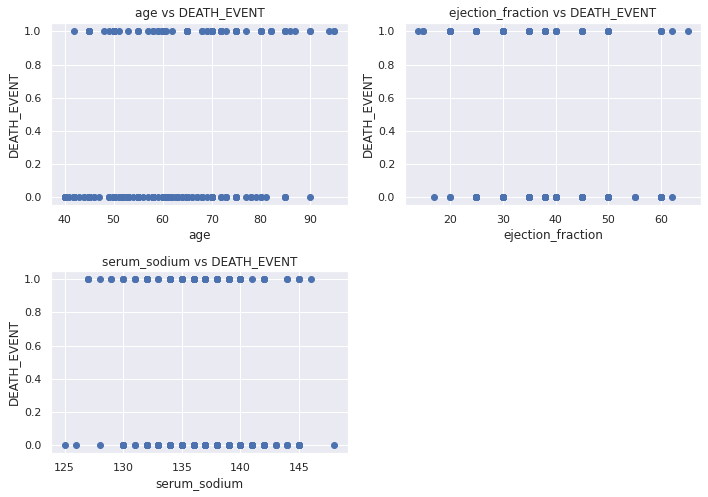

In [24]:
def scatter(x,fig):
    plt.subplot(3,2,fig)
    plt.scatter(data[x],data['DEATH_EVENT'])
    plt.title(x+' vs DEATH_EVENT')
    plt.ylabel('DEATH_EVENT')
    plt.xlabel(x)

plt.figure(figsize=(10,10))

scatter('age', 1)
scatter('ejection_fraction', 2)
scatter('serum_sodium', 3)
plt.tight_layout()

**Inferences:**

There is no direct relation of these features and Death Event i.e. Patients have died irrespective of their ages, ejection_fraction and serum sodium levels.


## Multivariate Analysis

We are going to plot each of the variables vs each of them to see how they are correlated wth each other in respect to our target variable Death Event.

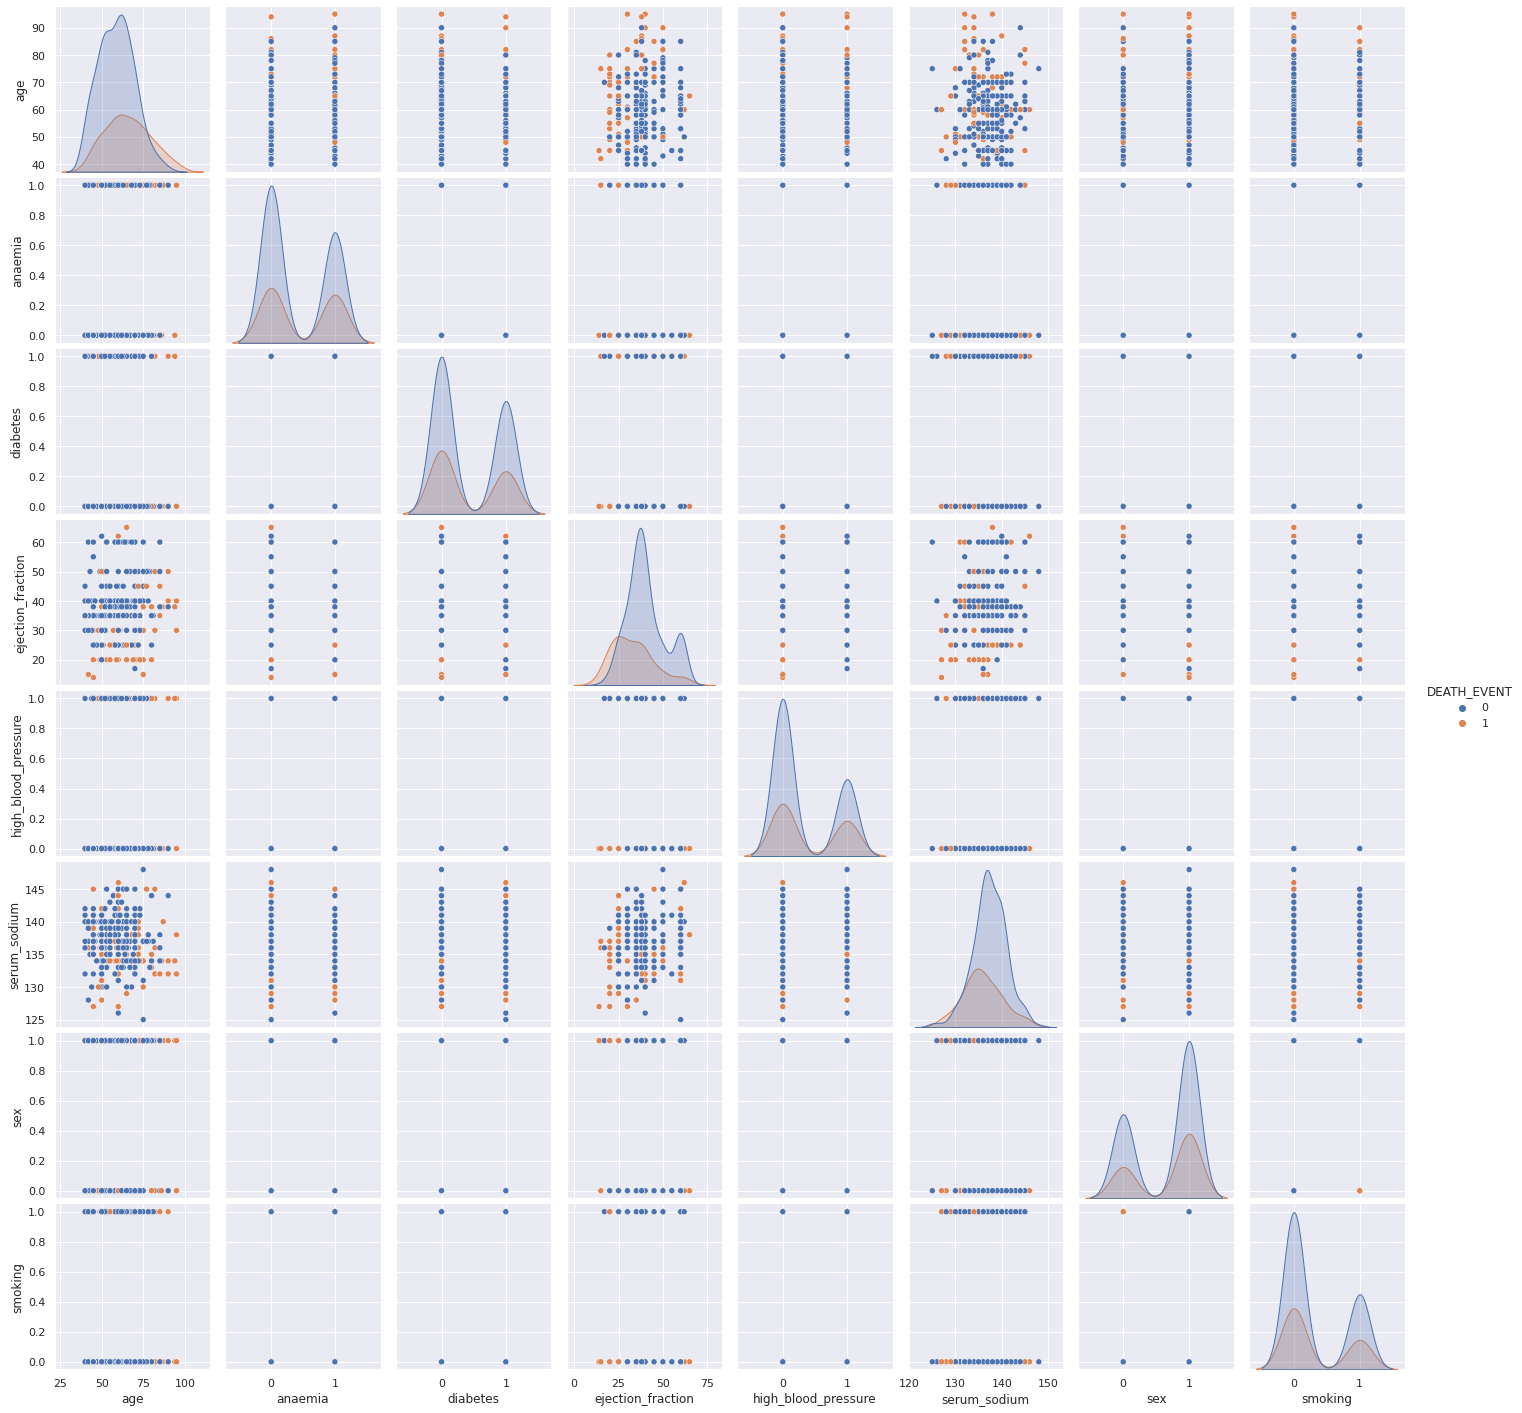

In [25]:
sns.pairplot(data, hue = 'DEATH_EVENT')
plt.show()

**Correlation Heatmaps**

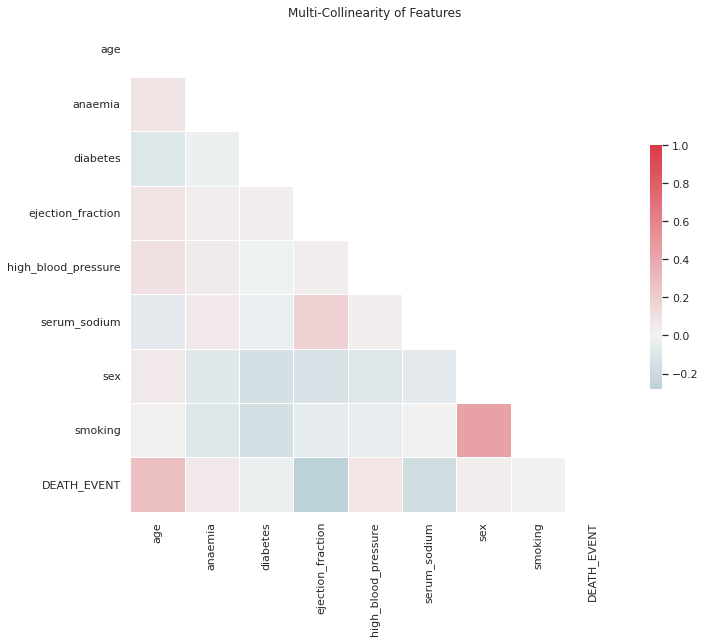

In [26]:
sns.set(style="whitegrid")
# Create a covariance matrix
corr = data.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')
plt.show()

**Inferences**

Since no significant feature is there which is showing high Multi Collinearity. Thus, in the model we are going to include each of these 8 features as input variables-
1. Age
2. Anaemia
3. Diabetes
4. Ejection Fraction
5. High Blood Pressure
6. Serum Sodium Level
7. Sex
8. Smoking



## Dividing the Dataset into Input and Output

In [27]:
#The output variable, y, is the Death Event column of the dataset, the dependent variable.
y = data[['DEATH_EVENT']]
#The input variable x, is the collection of all the predictors, the independent variables.
x = data.drop(labels='DEATH_EVENT', axis=1)

# Data Preprocessing: Standardization of Data
We must perform the data scaling before moving further towards training the model. It is a necessary step so as to bring all the featues under a similar scale to remove the bias towards feature(s) with higher numerical value.

In [28]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
data1 = pd.DataFrame(sc_x.fit_transform(x))
data1.head()

#data2 = pd.DataFrame(sc_x.inverse_transform(data1))
#data2.head()

,0,1,2,3,4,5,6,7
0,1.177467,-0.868614,-0.838742,-1.575703,1.358183,-1.773488,0.719816,-0.692675
1,-0.503946,-0.868614,-0.838742,0.007203,-0.736278,-0.224659,0.719816,-0.692675
2,0.336760,-0.868614,-0.838742,-1.575703,-0.736278,-2.031626,0.719816,1.443680
3,-0.924299,1.151259,-0.838742,-1.575703,-0.736278,0.033479,0.719816,-0.692675
4,2.438526,1.151259,-0.838742,0.183082,1.358183,-1.257212,0.719816,1.443680


The data is thus standardised.

# Model Building

### Train Test Split
Before building the model we are going to divide the dataset into two parts-
1. Training Data: Data on which the model will be traind
2. Testing Data: Data on which model will be evaluated.

In [29]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data1, y,random_state = 9)

print(train_x.shape)
print(test_x.shape)

(219, 8)
(74, 8)


The data (293 entries) is split into two parts-
1. Training Data - 219 entries
2. Test Data - 74 Entries

## Training the Model

We will be using the following Models to train our data-

**1. Logistic Regression**

**2. K-Nearest Neighbour (KNN) Classifier**
 

Also, we will calculate the

**1. Accuracy**

**2. Confusion Matrix**

**3. Classification Report**

**4. ROC-AUC Curve and the respective Score**

After that, we will be comparing the scores of both the models and determine which model gives the best accuracy for the prediction of Heart Rate Failure.

# 1. Logistic Regression

In [30]:
#Importing relevant library
from sklearn.linear_model import LogisticRegression
#Defining an object
reg=LogisticRegression(max_iter=100,solver='liblinear')
#Fitting the model into the training data
reg.fit(train_x,train_y)

LogisticRegression(solver='liblinear')

In [31]:
#Accuracy Score for the training data
score_train_reg = reg.score(train_x,train_y)*100
print('Accuracy of the model with training data is equal to',score_train_reg,'%.')

Accuracy of the model with training data is equal to 73.51598173515981 %.


In [32]:
#Accuracy Score for the test data
score_test_reg = reg.score(test_x,test_y)*100
print('Accuracy of our model with test data is equal to',score_test_reg,'%.')

Accuracy of our model with test data is equal to 81.08108108108108 %.


**Confusion Matrix**

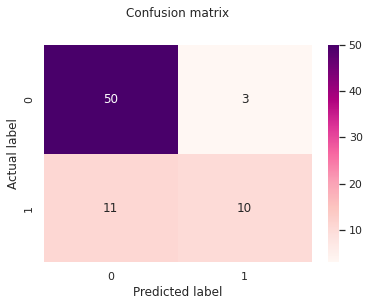

In [33]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#predictions using the classifier we had fit above
y_pred = reg.predict(test_x)
confusion_matrix(test_y,y_pred)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report**

**Precision Score**
    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)


**Recall Score**
    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

**F1 Score**
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)

In [34]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        53
           1       0.77      0.48      0.59        21

    accuracy                           0.81        74
   macro avg       0.79      0.71      0.73        74
weighted avg       0.81      0.81      0.80        74



**ROC-AUC Curve**

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two.

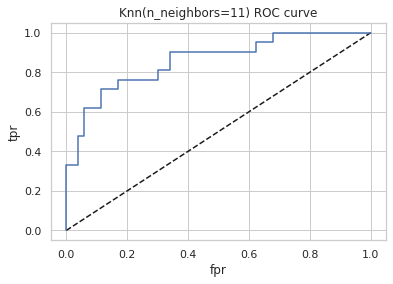

In [35]:
from sklearn.metrics import roc_curve
y_pred_proba = reg.predict_proba(test_x)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [36]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y,y_pred_proba)

0.8589398023360287

# 2. KNN Classification

In [37]:
#Importing Relevant Libraries
from sklearn.neighbors import KNeighborsClassifier
#In KNN Classification, since it is a parametric learning model, we have to choose the value of parameter k

#Building the model for k=1 upto k=20 and choosing the model with best training accuracy

test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(train_x,train_y)
    
    train_scores.append(knn.score(train_x,train_y))
    test_scores.append(knn.score(test_x,test_y))
    
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 77.02702702702703 % and k = [15]


**Result Visualisation**

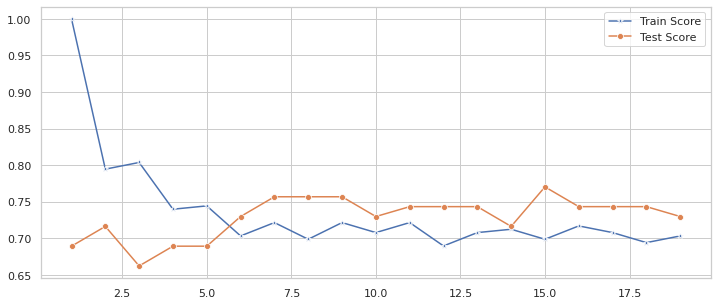

In [38]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

The best result is captured at k = 15 hence 15 is used for the final model

In [39]:
#Building KNN classifier with k=15 neighbors
knn = KNeighborsClassifier(15)

knn.fit(train_x,train_y)
score_test_knn = knn.score(test_x,test_y)*100

print('Testing Accuracy for the KNN Model is',knn.score(test_x,test_y)*100,'%')

Testing Accuracy for the KNN Model is 77.02702702702703 %


**Confusion Matrix**

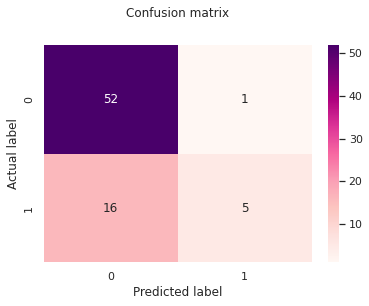

In [40]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#predictions using the classifier we had fit above
y_pred = knn.predict(test_x)
confusion_matrix(test_y,y_pred)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report**

In [41]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        53
           1       0.83      0.24      0.37        21

    accuracy                           0.77        74
   macro avg       0.80      0.61      0.61        74
weighted avg       0.78      0.77      0.72        74



**ROC-AUC Curve**

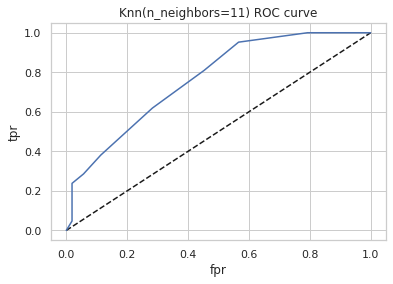

In [42]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(test_x)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [43]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y,y_pred_proba)

0.7637017070979335

# Accuracy Comparison of both the models

In [44]:
print('Accuracy of the Logistic Regression Model is',score_test_reg,'%')
print('Accuracy of the KNN Classification Model is',score_test_knn,'%')

if score_test_reg>score_test_knn:
    print('\nLogistic Regression model gives better accuracy than KNN Classification Model')
else: print('\nKNN Classification model gives better accuracy than Logistic Regression Model')
        

Accuracy of the Logistic Regression Model is 81.08108108108108 %
Accuracy of the KNN Classification Model is 77.02702702702703 %

Logistic Regression model gives better accuracy than KNN Classification Model
